# **Follow Up # 2**

## Done by: 
* Andrés Orrego Pérez - C.C 1216725315
* Diego Eusse Naranjo - C.C 1037655233
* Daniel García Alzate - C.C 1036955423

## Date:  Oct 20 - 2021

**1. Investigue y defina con sus propias palabras los siguientes conceptos:**

* **SGD:** Siglas en inglés de Gradiente Estocástico Descendente. Es un algoritmo de optimización comúnmente usado en _deep learning_ para encontrar los parámetros internos del modelo que se comportan bien ante alguna medida de desempeño como pérdida logarítmica o error cuadrático medio. Para encontrar los parámetros, el algoritmo calcula un gradiente en una función de error y se desplaza a un valor mínimo en dicha función. 
Por otra parte, este algoritmo es iterativo, lo cual implica que se realizan varios pasos en los que se hacen predicciones con los parámetros internos y se comparan con los valores reales para calcular el error y usar dicho error para actualizar los parámetros mediante técnicas como _backpropagation_-
* **epoch:** Hiperparámetro de una red neuronal que hace referencia al número de veces que se va a pasar el set de entrenamiento completo por el algoritmo para actualizar los parámetros internos del modelo.
* **minibatch:** Batch es un hiperparámetro de una red neuronal que define el número de muestras con las que se trabaja antes de actualizar los parámetros internos del modelo. Cuando este valor se selcciona entre 1 y el tamaño del set de entrenamiento, se le conoce como minibatch.
* **Learning Rate:** Hiperparámetro en aprendizaje de máquinas que determina el tamaño de paso en cada iteración mientras el algoritmo se mueve al mínimo en la función de error.
* **Architecture/Model:** Representación informativa de un fenómeno.
* **Parameters:** Coeficientes del modelo que son elegidos por el modelo mismo para hacer las predicciones.
* **Differentiable programming:** La programación diferenciable enmarca un paradigma de programación que permite a los programas reconstruir partes de ellos mismos usando optimización basada en gradientes.


**2. Cree en su drive dos folders con los nombres perro y gato respectivamente, coloque en cada uno 100 imágenes de perro y gato respectivamente a partir del dataset Cat_Dog_Data presente en la carpeta data. Entrene un modelo usando Fastai que sea el motor de inferencia de una aplicación como la que se muestra en el video demo.mp4. ¿Cuánta precisión obtuvo en el modelo?   use de ejemplo el archivo 03_Image_Classification_carros_example.ipynb o el lesson1-pets.ipynb si lo va a realizar con los datos residiendo directamente en el repositorio de Fastai.**

## Importar librerias

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4 MB 7.3 kB/s 
     |████████████████████████████████| 4.0 MB 36.0 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu111
    Uninstalling torchvision-0.10.0+cu111:
      Successfully uninstalled torchvision-0.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.4.0 which is incompatible.


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Relative Path Andrés Orrego

In [ ]:
%cd /content/drive/My Drive/Tópicos Avanzados en Inteligencia Artificial II/DeepLearning/FollowUps/FollowUp2

/content/drive/.shortcut-targets-by-id/1h2jUccoN5dH61NBF4I9-LPls8Ei6lMJl/DeepLearning/FollowUps/FollowUp2


In [ ]:
path = Path("train")
print(path)

.


Se definen las clases

In [ ]:
classes = ['gato','perro'] # python list

In [ ]:
np.random.seed(42)
#train = '.'
data = ImageDataBunch.from_folder(path, train="train", valid_pct=0.2,
        ds_tfms=get_transforms(), size=156, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['gato', 'perro']

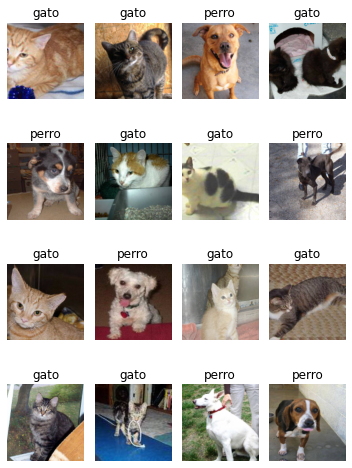

In [ ]:
data.show_batch(rows=4, figsize=(5,7))

## Arquitectura pre-entrenada

Se trabaja con Alexnet

In [ ]:
learn = cnn_learner(data, models.alexnet,pretrained = True, metrics=metrics.accuracy)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

## Entrenamiento

Una vez entrenado el modelo se obtiene una precisión final del 97%, en donde se puede ver una alta decadencia del error a lo largo del entrenamiento, lo cual se puede deber principalmente a que se esta trabajando con un modelo pre-entrenado.

In [ ]:
learn.fit_one_cycle(7)   # fit one cycle is better than fit !

epoch,train_loss,valid_loss,accuracy,time
0,1.409131,2.599365,0.500000,00:03
1,1.177814,0.578692,0.700000,00:02
2,0.929488,0.351382,0.825000,00:02
3,0.820446,0.255179,0.875000,00:02
4,0.684419,0.206714,0.925000,00:02
5,0.595762,0.196170,0.925000,00:02
6,0.517293,0.190137,0.925000,00:02


## Interpretación

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

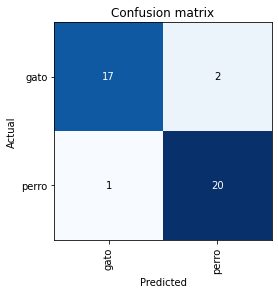

In [ ]:
interp.plot_confusion_matrix()

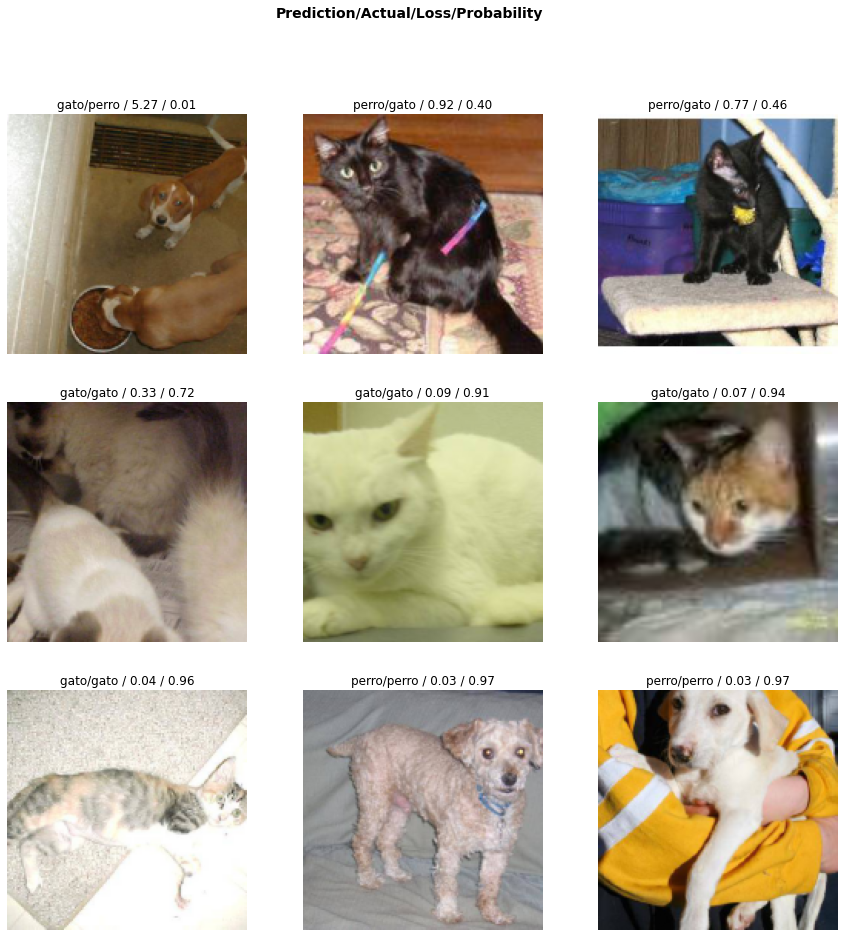

In [ ]:
interp.plot_top_losses(9, figsize=(15,15))

**3. Haga lo mismo pero ahora en Keras sobre TensorFlow usando los siguientes cuadernos: Clasificacíon_de_perros_y_gatos_KERAS.ipynb (para clasificar entre perros y gatos) y Keras_Clasificacion_de_Digitos_Usando_Redes_Convolucionales.ipynb (para el conjunto de digitos hechos a mano Mnist).**

**1. Conexión con Drive y librerías**

Montamos el drive origen:

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Verificamos contenido de carpetas de entrenamiento y validación:

In [ ]:
!ls "/content/drive/My Drive/DeepLearning/FollowUps/FollowUp2/train"

gato  perro


In [ ]:
!ls "/content/drive/My Drive/DeepLearning/FollowUps/FollowUp2/test"

gato  perro


Generamos URLs para carpetas de entrenamiento y validación:

In [ ]:
root_dir = "/content/drive/My Drive/DeepLearning/FollowUps/FollowUp2/"
train_dir = root_dir + 'train'
test_dir = root_dir + 'test'
validation_dir = root_dir + 'validation'
cat_dir = validation_dir + '/gato'
dog_dir = validation_dir + '/perro'
cat_picture = cat_dir + '/gato1.jpg'
cat_picture2 = cat_dir + '/gato2.jpg'
dog_picture = dog_dir + '/perro1.png'
dog_picture2 = dog_dir + '/perro2.jpg'

Importamos librerías necesarias:

In [ ]:
import numpy as np
import pandas as pd 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import random
import cv2
import tensorflow as tf

Definimos constantes:

In [ ]:
FAST_RUN = False
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

In [ ]:
# Modelo de clasificacion CNN 

model = Sequential()

## convolucion #1
model.add(Conv2D(32, (3, 3), input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),  activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=(2,2), pool_size=(2, 2)))
model.add(Dropout(0.25))

## convolucion #2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=(2,2), pool_size=(2, 2)))
model.add(Dropout(0.25))

## convolucion #3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=(2,2), pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) ### Aplanamos los valores

model.add(Dense(units = 600, activation = 'relu')) ## utilizamos 600 neuronas

model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(2, activation='sigmoid')) # 2 because we have cat and dog classes

sgd = SGD(learning_rate = 0.1)

model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate = 0.0003), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 73, 73, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 73, 73, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0

Callbacks

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Learning Rate Reduction

We will reduce the learning rate when then accuracy not increase for 2 steps

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
callbacks = [learning_rate_reduction]

Traning Generator:

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = IMAGE_SIZE,
    color_mode = "rgb",
    batch_size = 10,
    class_mode = "categorical"
)

labels = train_generator.class_indices

Found 200 images belonging to 2 classes.


Validation Generator:

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,
    target_size = IMAGE_SIZE,
    color_mode = "rgb",
    batch_size = 5,
    class_mode = "categorical"
)

Found 86 images belonging to 2 classes.


See how our generator work

In [ ]:
example_generator = train_datagen.flow_from_directory(
    directory = validation_dir,
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 4 images belonging to 2 classes.


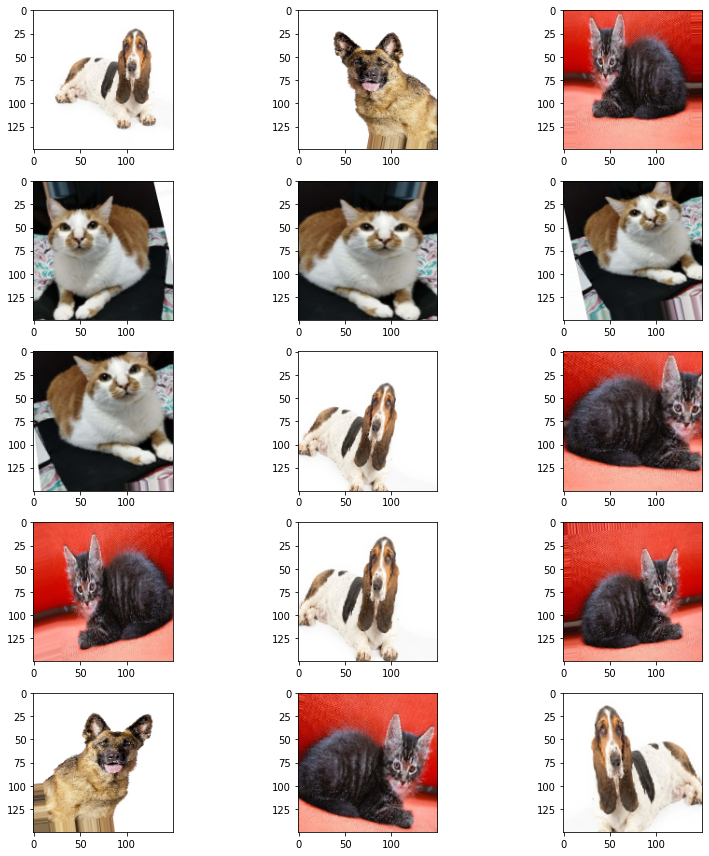

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

Fit Model

In [ ]:
epochs = 3 if FAST_RUN else 50
history = model.fit(
    train_generator, 
    epochs = epochs,
    validation_data = validation_generator,
    shuffle = True,
)

Epoch 1/50
20/20 [==============================] - 74s 2s/step - loss: 1.2931 - accuracy: 0.5500 - val_loss: 1.1415 - val_accuracy: 0.5000
Epoch 2/50
20/20 [==============================] - 3s 153ms/step - loss: 0.9662 - accuracy: 0.5650 - val_loss: 2.6830 - val_accuracy: 0.5000
Epoch 3/50
20/20 [==============================] - 3s 153ms/step - loss: 0.8426 - accuracy: 0.6350 - val_loss: 3.8491 - val_accuracy: 0.5000
Epoch 4/50
20/20 [==============================] - 3s 154ms/step - loss: 0.8407 - accuracy: 0.6200 - val_loss: 4.3287 - val_accuracy: 0.5000
Epoch 5/50
20/20 [==============================] - 3s 155ms/step - loss: 0.7229 - accuracy: 0.6700 - val_loss: 3.3774 - val_accuracy: 0.5000
Epoch 6/50
20/20 [==============================] - 3s 155ms/step - loss: 0.8048 - accuracy: 0.6500 - val_loss: 4.3675 - val_accuracy: 0.5000
Epoch 7/50
20/20 [==============================] - 3s 155ms/step - loss: 0.7283 - accuracy: 0.6600 - val_loss: 5.3635 - val_accuracy: 0.5000
Epoch 8/

**Resultado:** Se tiene una red neuronal con una precisión del 82,5% para el conjunto de imágenes de entrenamiento. Nada mal teniendo en cuenta que se trata de una red neuronal entrenada con una baja cantidad de imágenes y que la red neuronal no cuenta con Transfer Learning definido, debido a que Keras no lo trae implementado por defecto, como sí lo suele hacer FastAI.

Save Model

In [ ]:
model.save_weights("Keras.model")

Virtualize Training

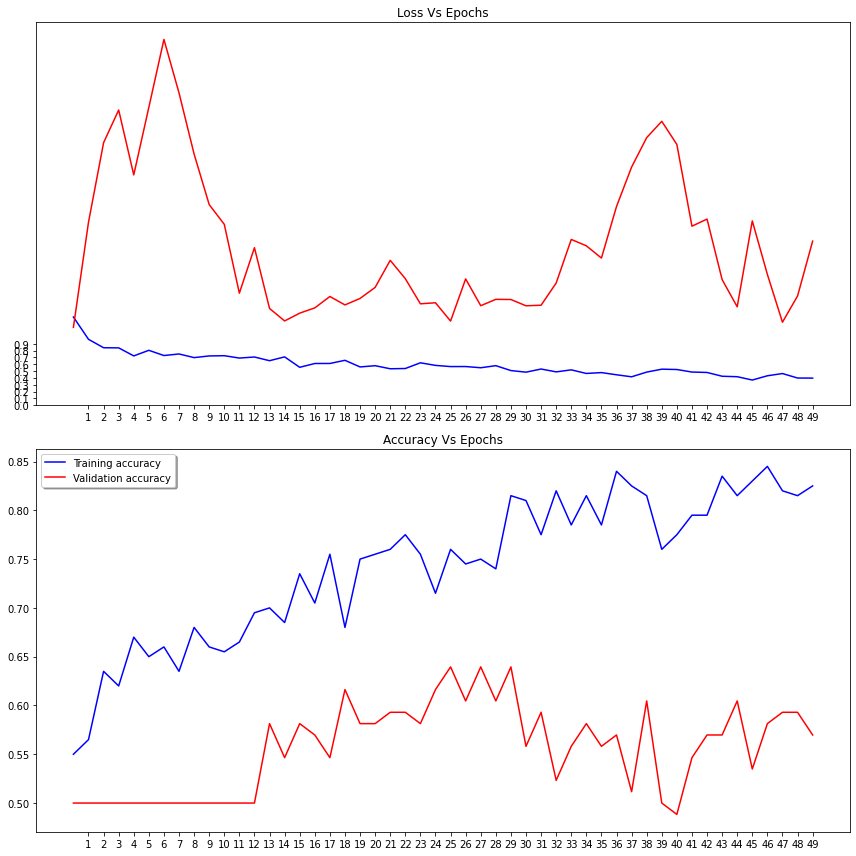

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.set_title('Loss Vs Epochs')

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))
ax2.set_title('Accuracy Vs Epochs')

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

Prepare Testing Data

In [ ]:
L = ['gato1.jpg', 'gato2.jpg', 'perro1.png', 'perro2.jpg']

#create new df 
test_df = pd.DataFrame({'filename':L})

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    shuffle=False
)

Found 4 images belonging to 2 classes.


In [ ]:
labels

{'gato': 0, 'perro': 1}

In [ ]:
predict = model.predict(test_generator)

In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

In [ ]:
predict

array([[0.7853777 , 0.07631846],
       [0.56967115, 0.07362656],
       [0.00158374, 0.7928526 ],
       [0.02889101, 0.94987327]], dtype=float32)

In [ ]:
test_df

,filename,category
0,gato1.jpg,0
1,gato2.jpg,0
2,perro1.png,1
3,perro2.jpg,1


In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [ ]:
test_df

,filename,category
0,gato1.jpg,gato
1,gato2.jpg,gato
2,perro1.png,perro
3,perro2.jpg,perro


In [ ]:
from google.colab.patches import cv2_imshow

def show_classification(image_path, target_size, model, test_df):
  # Predicting
  filename = image_path.split('/')[-1]
  indice = test_df.filename[test_df.filename == filename].index.tolist()[0]
  category = test_df['category'][indice]
  print(filename)
  print(category)
  
  # Preprocessing image
  img = cv2.imread(image_path)
  img_resized = cv2.resize(img, target_size)
  img_resized = img_resized.astype("float") / 255.0
  img_resized = tf.keras.utils.img_to_array(img_resized)
  img_resized = np.expand_dims(img_resized, axis=0)
  print("resized shape: ", img_resized.shape)
  cv2_imshow(cv2.resize(img, (150, 150)))

gato1.jpg
gato
resized shape:  (1, 150, 150, 3)


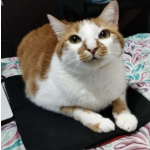

In [ ]:
show_classification(cat_picture, IMAGE_SIZE, model, test_df)

perro1.png
perro
resized shape:  (1, 150, 150, 3)


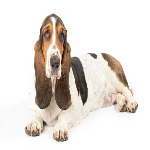

In [ ]:
show_classification(dog_picture, IMAGE_SIZE, model, test_df)

gato2.jpg
gato
resized shape:  (1, 150, 150, 3)


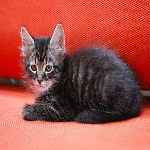

In [ ]:
show_classification(cat_picture2, IMAGE_SIZE, model, test_df)

perro2.jpg
perro
resized shape:  (1, 150, 150, 3)


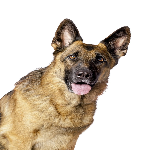

In [ ]:
show_classification(dog_picture2, IMAGE_SIZE, model, test_df)

**4. Use ahora el conjunto de datos MNIST Tiny (conjunto de números digitalizados a mano) del ejemplo anterior y cree un modelo para clasificar los números, usando una resnet18 en fastai, cuál fue la precisión usando solo 30 imágenes de c/u?, obtuvo una mejor precisión usando ahora 50 imágenes por cada número?**

In [59]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import random

In [3]:
path = untar_data(URLs.MNIST_TINY)

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_tiny/valid'),
 PosixPath('/root/.fastai/data/mnist_tiny/train'),
 PosixPath('/root/.fastai/data/mnist_tiny/test'),
 PosixPath('/root/.fastai/data/mnist_tiny/models'),
 PosixPath('/root/.fastai/data/mnist_tiny/labels.csv')]

In [5]:
classes = ['3','7']

In [51]:
slected_path=path/'train'

In [132]:
slected_list_30=[]
slected_list_50=[]
labels_30=[]
labels_50=[]

for sub_path in slected_path.iterdir():
  print(sub_path)
  slected_list=[number for (index,number) in enumerate(sub_path.iterdir())]
  slected_list_30=slected_list_30+random.sample(slected_list,30)
  slected_list_50=slected_list_50+random.sample(slected_list,50)
  labels_30=labels_30+[str(sub_path)[-1]]*30
  labels_50=labels_50+[str(sub_path)[-1]]*50

/root/.fastai/data/mnist_tiny/train/7
/root/.fastai/data/mnist_tiny/train/3


In [133]:
tfms = get_transforms(do_flip=False)

data_30=ImageDataBunch.from_lists(slected_path, slected_list_30, labels_30, valid_pct=0.15, ds_tfms=tfms, bs=10, size=26)

data_30.normalize()

ImageDataBunch;

Train: LabelList (51 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
7,7,7,7,7
Path: /root/.fastai/data/mnist_tiny/train;

Valid: LabelList (9 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
7,7,3,7,3
Path: /root/.fastai/data/mnist_tiny/train;

Test: None

In [134]:
tfms = get_transforms(do_flip=False)

data_50=ImageDataBunch.from_lists(slected_path, slected_list_50, labels_50, valid_pct=0.15, ds_tfms=tfms, bs=10, size=26)

data_50.normalize()

ImageDataBunch;

Train: LabelList (85 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
7,7,7,7,7
Path: /root/.fastai/data/mnist_tiny/train;

Valid: LabelList (15 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
3,7,7,3,7
Path: /root/.fastai/data/mnist_tiny/train;

Test: None

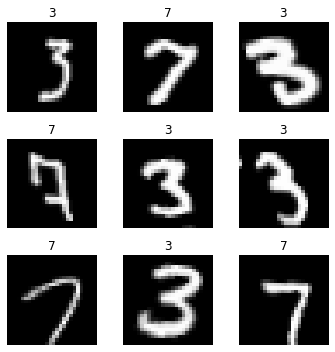

In [135]:
data_30.show_batch(rows=3, figsize=(5,5))

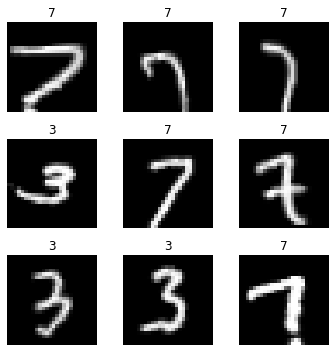

In [136]:
data_50.show_batch(rows=3, figsize=(5,5))

In [137]:
learn_30 = cnn_learner(data_30, models.resnet18,pretrained = True, metrics=metrics.accuracy)
learn_50 = cnn_learner(data_50, models.resnet18,pretrained = True, metrics=metrics.accuracy)

In [138]:
learn_30.fit_one_cycle(5) 

epoch,train_loss,valid_loss,accuracy,time
0,1.318023,0.506620,0.777778,00:00
1,1.142151,0.469576,0.777778,00:00
2,0.818562,0.739006,0.555556,00:00
3,0.848010,0.649435,0.777778,00:00
4,0.778597,0.384850,0.777778,00:00


In [139]:
learn_50.fit_one_cycle(5) 

epoch,train_loss,valid_loss,accuracy,time
0,1.228004,0.664318,0.600000,00:00
1,0.990506,0.487477,0.733333,00:00
2,0.912144,0.566765,0.800000,00:00
3,0.879699,0.439670,0.800000,00:00
4,0.744191,0.373788,0.866667,00:00


In [140]:
interp_30 = ClassificationInterpretation.from_learner(learn_30)
interp_50 = ClassificationInterpretation.from_learner(learn_50)

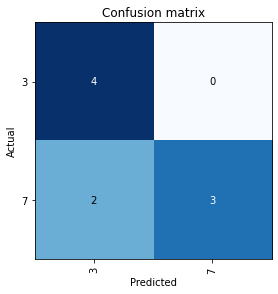

In [141]:
interp_30.plot_confusion_matrix()

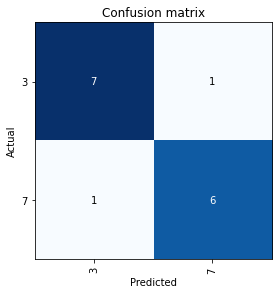

In [142]:
interp_50.plot_confusion_matrix()

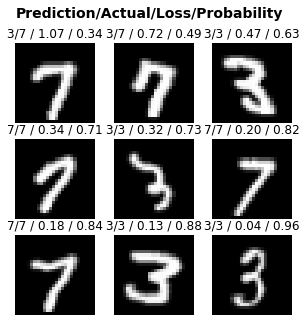

In [143]:
interp_30.plot_top_losses(9, figsize=(5,5))

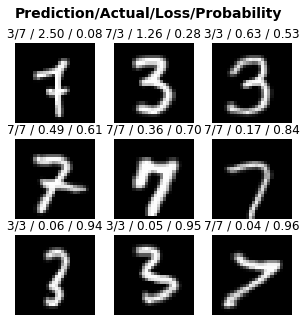

In [144]:
interp_50.plot_top_losses(9, figsize=(5,5))

La precisión usando 30 imágenes fue de 0.78, mientras que usando 50 imágenes fue de 0.87. A pesar de que es cierto que entre más imagénes se usen en la elaboración del modelo los resultados serán mejores, se puede decir que tanto 50 como 30 imagénes es muy poco como para tener un buen modelo. Si bien en la corrida actual el uso de 50 imagénes arrojó mejores resultados, si se corre un par de veces es probable que en algunas de ellas (dado el factor aleatorio de la selección de las imágenes y del modelo como tal) se presenten mejores resultados al usar 30 imágenes.
De esta manera se recomienda tener buena cantidad de imágenes al entrenar modelos, ya que las imágenes tienen muchos detalles y entre más imágenes vea el modelo, más fácil podrá identificarlos.